In [77]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt

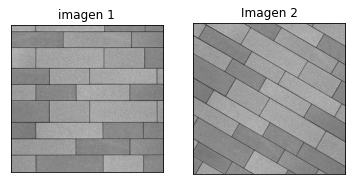

In [78]:
img1 = cv.imread('ladrillos1.png')
gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2 = cv.imread('ladrillos2.png')
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)


fig1 = plt.figure()
ax1 = plt.subplot(1,2,1),plt.imshow(img1,cmap='gray')
plt.title('imagen 1'),plt.xticks([]), plt.yticks([])
ax2 = plt.subplot(1,2,2),plt.imshow(img2,cmap='gray')
plt.title('Imagen 2'),plt.xticks([]), plt.yticks([])
plt.show()

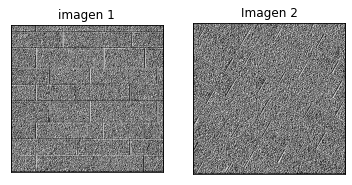

In [79]:
img_LBP1 = Basic_LBP(gray1)
img_LBP2 = Basic_LBP(gray2)

Graficar(img_LBP1,img_LBP2)

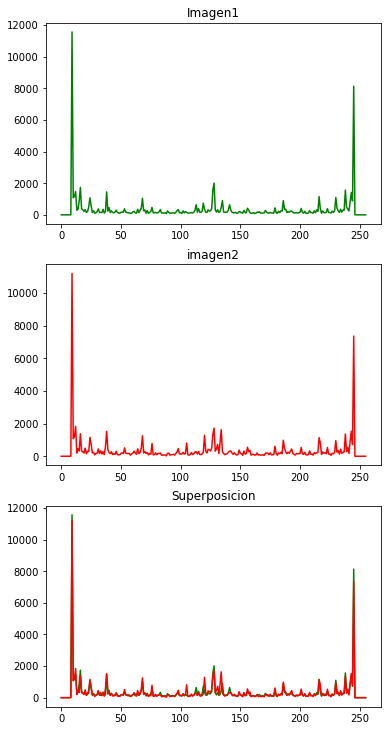

La comparacion de histogramas nos arroja un MSE  : 28189.55


In [144]:
hist1,hist2 = Histograma(img_LBP1,img_LBP2)

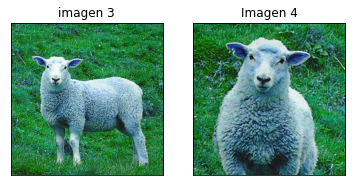

In [86]:
img3 = cv.imread('oveja1.png')
gray3 = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
img4 = cv.imread('oveja2.png')
gray4 = cv.cvtColor(img4,cv.COLOR_BGR2GRAY)

fig2 = plt.figure()
ax3 = plt.subplot(1,2,1),plt.imshow(img3,cmap='gray')
plt.title('imagen 3'),plt.xticks([]), plt.yticks([])
ax4 = plt.subplot(1,2,2),plt.imshow(img4,cmap='gray')
plt.title('Imagen 4'),plt.xticks([]), plt.yticks([])
plt.show()

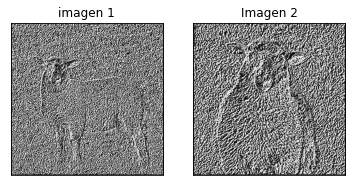

In [87]:
img_LBP3 = Basic_LBP(gray3)
img_LBP4 = Basic_LBP(gray4)
Graficar(img_LBP3,img_LBP4)

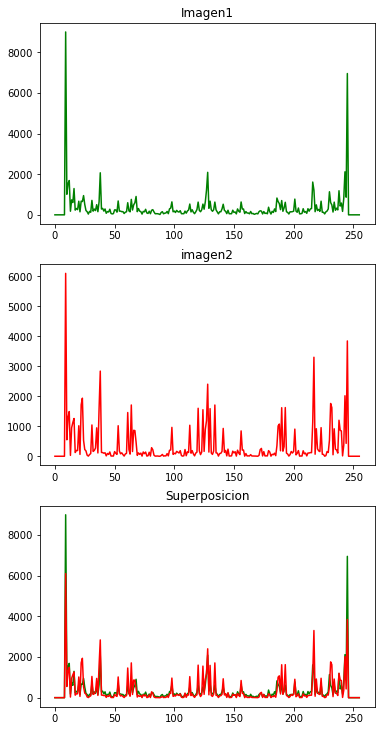

La comparacion de histogramas nos arroja un MSE  : 167457.54


In [145]:
hist3,hist4 = Histograma(img_LBP3,img_LBP4)

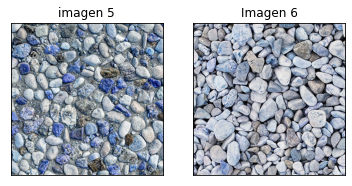

In [90]:
img5 = cv.imread('piedras1.png')
gray5 = cv.cvtColor(img5,cv.COLOR_BGR2GRAY)
img6 = cv.imread('piedras2.png')
gray6 = cv.cvtColor(img6,cv.COLOR_BGR2GRAY)

fig3 = plt.figure()
ax5 = plt.subplot(1,2,1),plt.imshow(img5,cmap='gray')
plt.title('imagen 5'),plt.xticks([]), plt.yticks([])
ax6 = plt.subplot(1,2,2),plt.imshow(img6,cmap='gray')
plt.title('Imagen 6'),plt.xticks([]), plt.yticks([])
plt.show()

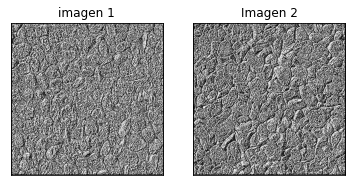

In [91]:
img_LBP5 = Basic_LBP(gray5)
img_LBP6 = Basic_LBP(gray6)
Graficar(img_LBP5,img_LBP6)

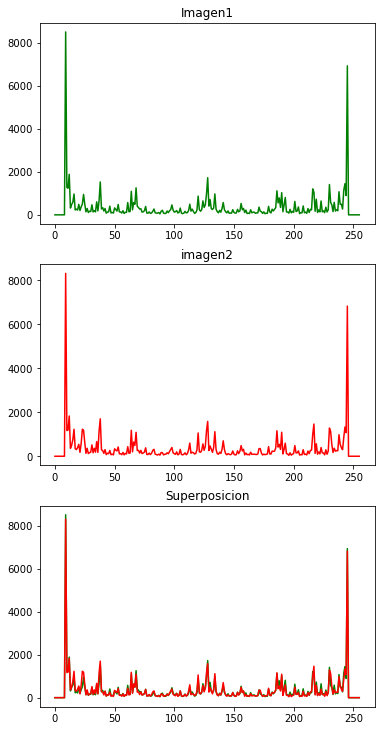

La comparacion de histogramas nos arroja un MSE  : 10785.90


In [143]:
hist5,hist6 = Histograma(img_LBP5,img_LBP6)

In [183]:
Comparar_histogramas(hist1,hist2,hist3,hist4,hist5,hist6)

La comparacion del 1er histograma con el 2 histograma tiene un MSE: 28189.55
La comparacion del 1er histograma con el 3 histograma tiene un MSE: 58568.29
La comparacion del 1er histograma con el 4 histograma tiene un MSE: 374285.68
La comparacion del 1er histograma con el 5 histograma tiene un MSE: 71787.84
La comparacion del 1er histograma con el 6 histograma tiene un MSE: 83871.62

El histograma que mas se aproxima es el histograma 2


In [57]:
def Basic_LBP(img):
    img_LBP = np.zeros(img.shape)
    M,N = img.shape
    exp = np.array([128,64,32,16,8,4,2,1])

    for m in range(1,M-1):
        for n in range(1,N-1):
            vecinos = np.array([img[m,n-1], img[m-1,n-1], img[m-1,n], img[m-1,n+1],
                                img[m,n+1], img[m+1,n+1], img[m+1,n], img[m+1,n-1]])
            binario = img[m,n] > vecinos
            val = np.sum(exp*binario)
            img_LBP[m,n] = val
    
    return img_LBP
    

In [60]:
def Graficar(img1,img2):
    fig1 = plt.figure()
    ax1 = plt.subplot(1,2,1),plt.imshow(img1,cmap='gray')
    plt.title('imagen 1'),plt.xticks([]), plt.yticks([])
    ax2 = plt.subplot(1,2,2),plt.imshow(img2,cmap='gray')
    plt.title('Imagen 2'),plt.xticks([]), plt.yticks([])
    plt.show()

In [142]:
def Histograma(img_LBP1,img_LBP2):
    
    hist1,_ = np.histogram(img_LBP1.ravel(),256,[-10,266])
    hist2,_ = np.histogram(img_LBP2.ravel(),256,[-10,266])
    
    mse = np.square(hist1 - hist2).mean()
    
    plt.subplots_adjust(top=2.5)
    ax1 = plt.subplot(311)
    ax1.plot(hist1,color='g')
    ax1.set_title('Imagen1')
    ax2 = plt.subplot(312)
    ax2.set_title('imagen2')
    ax2.plot(hist2,color='r')
    ax3 = plt.subplot(313)
    ax3.set_title('Superposicion')
    ax3.plot(hist1,color='g')
    ax3.plot(hist2,color='r')
    plt.show()
    
    print('La comparacion de histogramas nos arroja un MSE  : {:.2f}'.format(mse))
    
    return hist1,hist2


In [179]:

def Comparar_histogramas(hist1,hist2,hist3,hist4,hist5,hist6):
    mse = np.zeros([5])
    mse[0] = np.square(hist1 - hist2).mean()
    mse[1] = np.square(hist1 - hist3).mean()
    mse[2] = np.square(hist1 - hist4).mean()
    mse[3] = np.square(hist1 - hist5).mean()
    mse[4] = np.square(hist1 - hist6).mean()
    
    menor = mse[0]
    for i in range(0,5):
        if(menor<mse[i]):
            menor = mse[i]
            menor_n = i
        hist_n = i
        print('La comparacion del 1er histograma con el {} histograma tiene un MSE: {:.2f}'.format(i+2,mse[i]))
    print('\nEl histograma que mas se aproxima es el histograma {}'.format(menor_n))
    